<a href="https://colab.research.google.com/github/rohittttt28/Casear_pred/blob/master/CasearCipher_keyprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [3]:

url = 'https://raw.githubusercontent.com/rohittttt28/News_Scrapy/master/review.csv'
df1 = pd.read_csv(url)

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import random
import string
import io

#Input of csv 
df=pd.read_csv('https://raw.githubusercontent.com/rohittttt28/News_Scrapy/master/review.csv',usecols=["Review Text"]).rename(columns={"Review Text": "Review"}).dropna()

df['Review']=df['Review'].map(lambda x :x.lower()).map(lambda x:x.replace(" ",""))

df['id']=[n for n in np.arange(len(df))]
df=df.set_index('id')


In [4]:
def encrypt(text,s): 
    result = "" 
    th=str(text)
    for i in range(len(th)): 
        char = th[i] 
        if (char.isupper()): 
            result += chr((ord(char) + s-65) % 26 + 65) 
        else: 
            result += chr((ord(char) + s - 97) % 26 + 97) 
  
    return result

In [5]:
cipher=[]
key=[]
for i in df["Review"]:
    j=np.random.randint(1,5)
    key.append(j)
    cipher.append(encrypt(i, j))
    
    
    
df['cipher']=cipher 
df['key']=key

In [6]:
df

,Review,cipher,key
id,,,
0,absolutelywonderful-silkyandsexyandcomfortable,bctpmvufmzxpoefsgvmbtjmlzboetfyzboedpngpsubcmf,1
1,lovethisdress!it'ssooopretty.ihappenedtofindit...,oryhwklvguhvvrlwxvvrrrsuhwwbelkdsshqhgwrilqglw...,3
2,ihadsuchhighhopesforthisdressandreallywantedit...,mlehwygllmkllstiwjsvxlmwhviwwerhvieppcaerxihmx...,4
3,"ilove,love,lovethisjumpsuit.it'sfun,flirty,and...",knqxgbnqxgbnqxgvjkulworuwkvdkvwuhwpbhnktvabcpf...,2
4,thisshirtisveryflatteringtoallduetotheadjustab...,wklvvkluwlvyhubiodwwhulqjwrdoogxhwrwkhdgmxvwde...,3
...,...,...,...
22636,iwasveryhappytosnagthisdressatsuchagreatprice!...,lzdvyhubkdssbwrvqdjwklvguhvvdwvxfkdjuhdwsulfhr...,3
22637,"itremindsmeofmaternityclothes.soft,stretchy,sh...",lwuhplqgvphripdwhuqlwbforwkhvevriwcvwuhwfkbcvk...,3
22638,"thisfitwell,butthetopwasveryseethrough.thisnev...",vjkuhkvygnnbdwvvjgvqrycuxgtauggvjtqwijdvjkupgx...,2


In [7]:
df['cipher'][22639]

'mfsyklxxlmwhviwwjsveaihhmrkmlezixlmwwyqqivderhmxywwsgyxifyrjsvxyrexipcxlijmxmwryxtivjigxfxliqihmyqjmxwqcaemwxtivjigxpcdfyxaewaecxsspsrkerhxssfmkmrxlifywxerhwlsyphivwfmjmaerxihxswtirhxliqsricdmgsyphkixmxxempsvihdfyxmnywxjipxpmoimxqmklxrsxfiasvxlmxfwmhirsxiexlmwhviwwaewhipmzivihxsqiamxlersvhwxvsqxeksrmxerhmjsyrhmxqyglglietivxliviejxivpssomrks'

In [8]:
c=['e','t','a','o','i','n']
from collections import Counter
rl=[]
for h in range(len(df)):
    
    mf = pd.Series(dict(Counter(df['cipher'][h]))).nlargest(6).index.values
    x=[]
    for i in range(6):
        for j in range(6):
            if ord(mf[i])-ord(c[j])>=0:
                x.append(abs(ord(mf[i])-ord(c[j])))
            
            else:
                x.append((ord(mf[i])-ord(c[j]))+26)
    rl.append(x)            
                

In [9]:
features=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30','f31','f32','f33','f34','f35','f36']
df1=pd.DataFrame(rl,columns=features)

In [10]:
 df1['key']=df['key']

In [11]:
df1.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,key
0,23,8,1,13,19,14,8,19,12,24,4,25,11,22,15,1,7,2,1,12,5,17,23,18,15,0,19,5,11,6,21,6,25,11,17,12,1
1,3,14,7,19,25,20,18,3,22,8,14,9,7,18,11,23,3,24,13,24,17,3,9,4,2,13,6,18,24,19,12,23,16,2,8,3,3
2,4,15,8,20,0,21,19,4,23,9,15,10,0,11,4,16,22,17,8,19,12,24,4,25,14,25,18,4,10,5,11,22,15,1,7,2,4
3,6,17,10,22,2,23,17,2,21,7,13,8,2,13,6,18,24,19,12,23,16,2,8,3,18,3,22,8,14,9,9,20,13,25,5,0,2
4,18,3,22,8,14,9,3,14,7,19,25,20,7,18,11,23,3,24,17,2,21,7,13,8,10,21,14,0,6,1,25,10,3,15,21,16,3


In [12]:
from sklearn.model_selection import train_test_split
X=df1.drop(labels='key',axis=1)
y=df1['key']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
knn.score(X_test, y_test)

0.8800565271153507

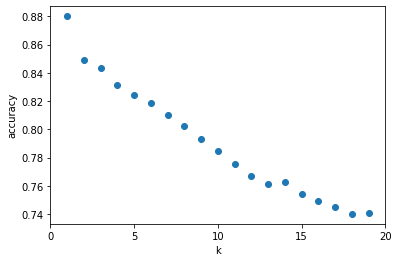

In [16]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

**Let's do it Naive Bayes Classifier**

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [18]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test,model.predict(X_test)))

Accuracy: 0.5248189365836424


In [20]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test,clf.predict(X_test)))

Accuracy: 0.6369899311075782


In [22]:
df2 = pd.read_csv('https://raw.githubusercontent.com/rohittttt28/News_Scrapy/master/new_review.csv',usecols=["Reviews"])
df2



,Reviews
0,I feel so LUCKY to have found this used (phone...
1,"nice phone, nice up grade from my pantach revu..."
2,Very pleased
3,It works good but it goes slow sometimes but i...
4,Great phone to replace my lost phone. The only...
...,...
1594,its perfert! Had everything I expected.
1595,Great phone for the price and the headset is a...
1596,"CONNECTION ON PHONE CALLS IS TERRIBLE, DOES NO..."
1597,"BUY A CASE, BUY A CASE BUY A CASE! every revie..."


In [23]:
df2['Review']=df2['Reviews'].map(lambda x :x.lower()).map(lambda x:x.replace(" ",""))
df2['Review1']=df2['Review'].map(lambda x:len(x)>26)
df3=df2[df2['Review1']==True]
df3['id']=[n for n in np.arange(len(df3))]

df3=df3.set_index('id')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
df3

,Reviews,Review,Review1
id,,,
0,I feel so LUCKY to have found this used (phone...,ifeelsoluckytohavefoundthisused(phonetous&notu...,True
1,"nice phone, nice up grade from my pantach revu...","nicephone,niceupgradefrommypantachrevue.verycl...",True
2,It works good but it goes slow sometimes but i...,itworksgoodbutitgoesslowsometimesbutitsaverygo...,True
3,Great phone to replace my lost phone. The only...,greatphonetoreplacemylostphone.theonlythingist...,True
4,I already had a phone with problems... I know ...,ialreadyhadaphonewithproblems...iknowitstatedi...,True
...,...,...,...
1126,its perfert! Had everything I expected.,itsperfert!hadeverythingiexpected.,True
1127,Great phone for the price and the headset is a...,greatphoneforthepriceandtheheadsetisagreatperk...,True
1128,"CONNECTION ON PHONE CALLS IS TERRIBLE, DOES NO...","connectiononphonecallsisterrible,doesnotkeeptr...",True


In [25]:
cipher=[]
key=[]
for i in df3["Review"]:
    j=np.random.randint(1,5)
    key.append(j)
    cipher.append(encrypt(i, j))
    
    
    
df3['cipher']=cipher 
df3['key']=key

In [26]:
df3

,Reviews,Review,Review1,cipher,key
id,,,,,
0,I feel so LUCKY to have found this used (phone...,ifeelsoluckytohavefoundthisused(phonetous&notu...,True,jgffmtpmvdlzupibwfgpvoeuijtvtfewqipofupvtuopuv...,1
1,"nice phone, nice up grade from my pantach revu...","nicephone,niceupgradefrommypantachrevue.verycl...",True,ojdfqipofaojdfvqhsbefgspnnzqboubdisfwvfcwfszdm...,1
2,It works good but it goes slow sometimes but i...,itworksgoodbutitgoesslowsometimesbutitsaverygo...,True,lwzrunvjrrgexwlwjrhvvorzvrphwlphvexwlwvdyhubjr...,3
3,Great phone to replace my lost phone. The only...,greatphonetoreplacemylostphone.theonlythingist...,True,kviextlsrixsvitpegiqcpswxtlsrifxlisrpcxlmrkmwx...,4
4,I already had a phone with problems... I know ...,ialreadyhadaphonewithproblems...iknowitstatedi...,True,mepviehclehetlsriamxltvsfpiqwfffmorsamxwxexihm...,4
...,...,...,...,...,...
1126,its perfert! Had everything I expected.,itsperfert!hadeverythingiexpected.,True,jutqfsgfsupibefwfszuijohjfyqfdufec,1
1127,Great phone for the price and the headset is a...,greatphoneforthepriceandtheheadsetisagreatperk...,True,hsfbuqipofgpsuifqsjdfboeuififbetfujtbhsfbuqfsl...,1
1128,"CONNECTION ON PHONE CALLS IS TERRIBLE, DOES NO...","connectiononphonecallsisterrible,doesnotkeeptr...",True,frqqhfwlrqrqskrqhfdoovlvwhuuleohcgrhvqrwnhhswu...,3


In [27]:
c=['e','t','a','o','i','n']
from collections import Counter
rl=[]
for h in range(len(df3)):
    
    mf = pd.Series(dict(Counter(df3['cipher'][h]))).nlargest(6).index.values
    x=[]
    for i in range(6):
        for j in range(6):
            if ord(mf[i])-ord(c[j])>=0:
                x.append(abs(ord(mf[i])-ord(c[j])))
            
            else:
                x.append((ord(mf[i])-ord(c[j]))+26)
    rl.append(x)            
                

In [28]:
features=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30','f31','f32','f33','f34','f35','f36']
df8=pd.DataFrame(rl,columns=features)

In [29]:
df8['key']=df3['key']
df8

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,key
0,1,12,5,17,23,18,11,22,15,1,7,2,23,8,1,13,19,14,16,1,20,6,12,7,10,21,14,0,6,1,8,19,12,24,4,25,1
1,1,12,5,17,23,18,23,8,1,13,19,14,10,21,14,0,6,1,16,1,20,6,12,7,14,25,18,4,10,5,15,0,19,5,11,6,1
2,13,24,17,3,9,4,18,3,22,8,14,9,7,18,11,23,3,24,17,2,21,7,13,8,3,14,7,19,25,20,5,16,9,21,1,22,3
3,19,4,23,9,15,10,14,25,18,4,10,5,4,15,8,20,0,21,13,24,17,3,9,4,0,11,4,16,22,17,8,19,12,24,4,25,4
4,19,4,23,9,15,10,4,15,8,20,0,21,8,19,12,24,4,25,0,11,4,16,22,17,1,12,5,17,23,18,3,14,7,19,25,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,1,12,5,17,23,18,16,1,20,6,12,7,5,16,9,21,1,22,14,25,18,4,10,5,12,23,16,2,8,3,4,15,8,20,0,21,1
1127,1,12,5,17,23,18,16,1,20,6,12,7,14,25,18,4,10,5,23,8,1,13,19,14,11,22,15,1,7,2,4,15,8,20,0,21,1
1128,17,2,21,7,13,8,3,14,7,19,25,20,13,24,17,3,9,4,12,23,16,2,8,3,25,10,3,15,21,16,7,18,11,23,3,24,3
1129,3,14,7,19,25,20,25,10,3,15,21,16,0,11,4,16,22,17,17,2,21,7,13,8,12,23,16,2,8,3,7,18,11,23,3,24,3


In [30]:
from sklearn.model_selection import train_test_split
X1=df8.drop(labels='key',axis=1)
y1=df8['key']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

In [31]:
clf = GaussianNB()

clf.fit(X1_train,y1_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
print("Accuracy:",metrics.accuracy_score(y1_test,clf.predict(X1_test)))

Accuracy: 0.4911660777385159


# KNN classifier works best as No of Votes are Involved

In [33]:
knn_new5= KNeighborsClassifier(n_neighbors = 5)
# It is providing best fit for 5 neighbors

knn_new5.fit(X_train,y_train)
print("Accuracy:",metrics.accuracy_score(y1,knn_new5.predict(X1)))

Accuracy: 0.6923076923076923
